<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [11]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [13]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [14]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


Text(0, 0.5, 'revenue')

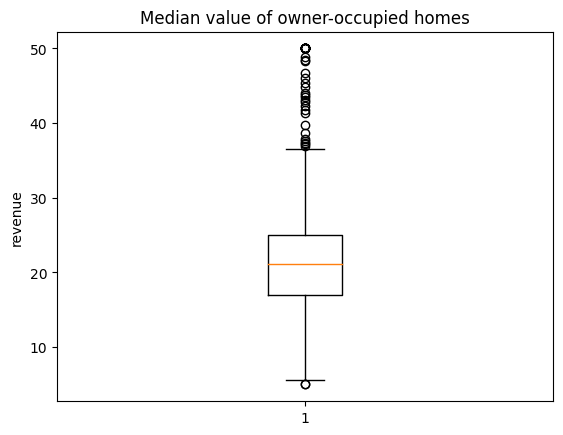

In [7]:
MEDV = boston_df.MEDV
plt.boxplot(MEDV)
plt.title("Median value of owner-occupied homes")
plt.ylabel('revenue')

Text(0.5, 0, 'time')

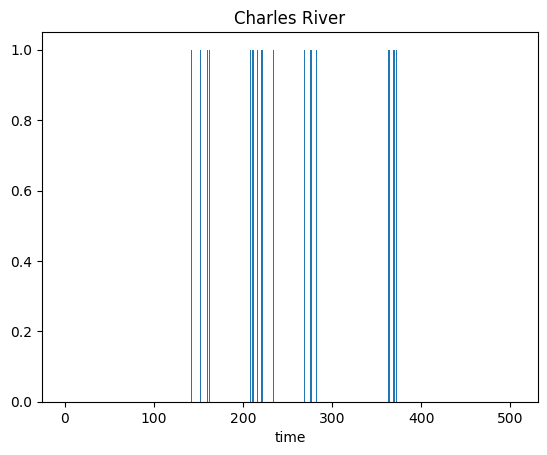

In [15]:
CHAS = list(boston_df.CHAS)
CHASx = list(range(0,len(CHAS)))
plt.bar(CHASx,CHAS)
plt.title('Charles River')
plt.xlabel('time')

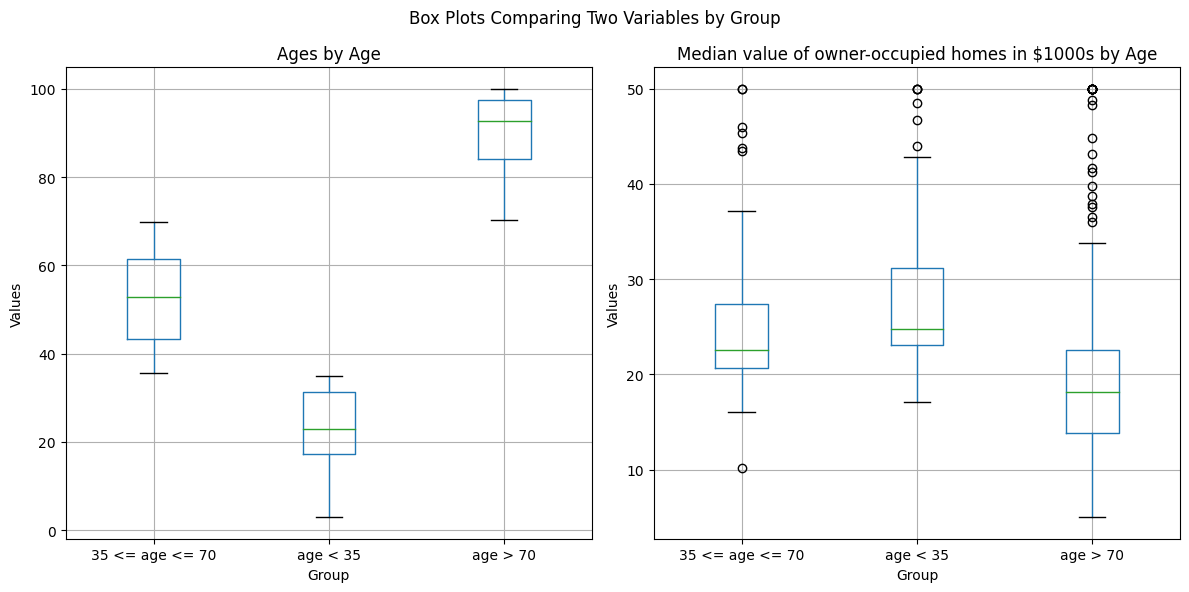

In [16]:
AGEp = boston_df.AGE
AGE = list(AGEp)
group = list(range(0,len(AGE)))
for x in range(0,len(AGE)):
    if AGE[x] > 70:
        group[x] = 'age > 70'
    elif AGE[x] < 35:
        group[x] = 'age < 35'
    else:
        group[x] = '35 <= age <= 70'
data = {
    'Var1': AGE,
    'Var2': MEDV,
    'Group': group
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a box plot for each variable, separated by groups
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Box plt for Var1
df.boxplot(column='Var1', by='Group', ax=axes[0])
axes[0].set_title('Ages by Age')
axes[0].set_xlabel('Group')
axes[0].set_ylabel('Values')

# Box plot for Var2
df.boxplot(column='Var2', by='Group', ax=axes[1])
axes[1].set_title('Median value of owner-occupied homes in $1000s by Age')
axes[1].set_xlabel('Group')
axes[1].set_ylabel('Values')

# Adjust layout
plt.suptitle('Box Plots Comparing Two Variables by Group')
plt.tight_layout()
plt.show()

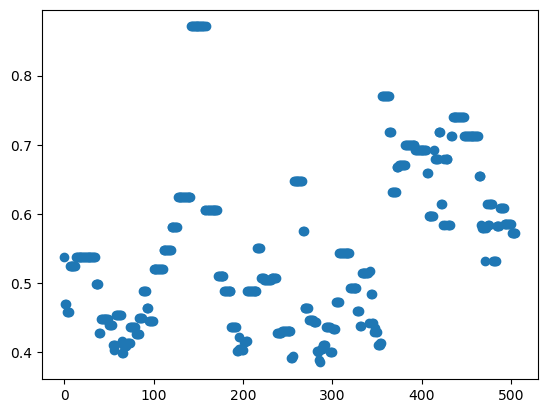

In [17]:
NOX = boston_df.NOX
Time = list(range(0,len(NOX)))
plt.scatter(Time,NOX)

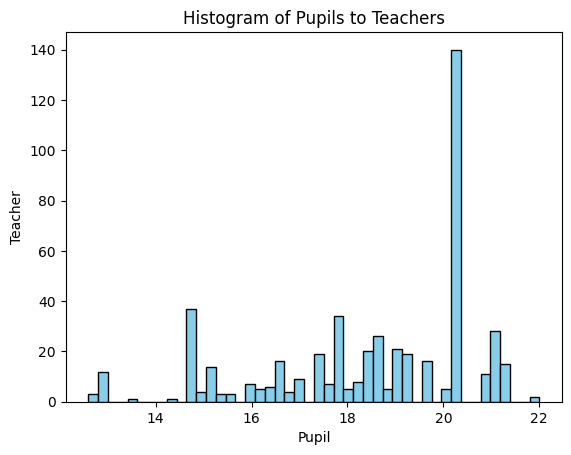

In [18]:
PTRATIO = boston_df.PTRATIO
dis = len(set(PTRATIO))
plt.hist(PTRATIO, bins=dis, color='skyblue', edgecolor='black')
    
# Add labels and title
plt.xlabel('Pupil')
plt.ylabel('Teacher')
plt.title('Histogram of Pupils to Teachers')
    
# Show the plot
plt.show()

In [64]:
MEDVa = np.array(MEDV)
CHASa = np.array(CHAS)
t_statistic, p_value = stats.ttest_ind(MEDVa, CHASa)
print(stats.ttest_ind(MEDVa, CHASa))
if p_value < a:
    print("ignore")

AGEa = np.array(AGE)
f_statistic, p_value = stats.f_oneway(MEDVa, AGEa)
print(stats.f_oneway(MEDVa, AGEa))
if p_value < a:
    print("ignore")

NOXa = np.array(NOX)
INDUS = boston_df.INDUS
INDUSa = np.array(INDUS)
correlation_coefficient, p_value = stats.pearsonr(NOXa, INDUSa)
print(stats.pearsonr(NOXa, INDUSa))
if p_value < a:
    print("ignore")

DIS = boston_df.DIS
X = boston_df.DIS
Y = MEDV
X = sm.add_constant(X) 

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

TtestResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305, df=1010.0)
ignore
F_onewayResult(statistic=1223.1740271875933, pvalue=3.20946197250671e-176)
ignore
PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)
ignore


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 14 Mar 2025   Prob (F-statistic):           1.21e-08
Time:                        11:52:40   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""